1. **Importing necessary libraries.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. **Extracting Data and displaying few.**

In [4]:
sales_df = pd.read_csv('/content/Ace Superstore Retail Dataset(in).csv')
locations_df = pd.read_csv('/content/Store Locations(Store Locations).csv')

print(sales_df.head(5))
print(locations_df.head(5))

     Order ID  Order Date Order Mode Customer ID      City Postal Code  \
0  BTC-245712   6/22/2024     Online    LO028977    Norton          S8   
1  NZR-891212   3/15/2024   In-Store    OH046670  West End        DN36   
2  TDN-811093   2/29/2024     Online    FH015492   Newtown        RG20   
3  MIX-746378  10/25/2024   In-Store    ZZ015342  East End        BH21   
4  UGI-201465   8/18/2024     Online    TV075977    Seaton        LE15   

   Country           Region                  Product ID          Product Name  \
0  England              NaN  01JZ3N512GHNAJSF3HCCQ0PQYY  Flavored Popcorn Mix   
1  England  East of England  01JZ3N56DDVK7Y600QGH2M6T1X             Olive Oil   
2  England    East Midlands  01JZ3N53A64TW72TVK28SMMXKX   Children's Backpack   
3  England       North West  01JZ3N572S4RVA29Y33YRWH174  Honey Butter Popcorn   
4  England    East Midlands  01JZ3N52RT7CJNB27BFS6H8BF7      Sliced Cucumbers   

            Category          Sub-Category  Sales  Cost Price  Quant

3. **Identifying and checking missing values.**

In [5]:
# checking info and missing values
print(sales_df.info())
print(sales_df.isnull().sum())

# stats to ranges
print(sales_df.describe())

# handling duplicates
sales_df = sales_df.drop_duplicates()

# filling missing values with 'unknown' if any
sales_df['Region'] = sales_df['Region'].fillna('unknown')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      11000 non-null  object 
 1   Order Date    11000 non-null  object 
 2   Order Mode    11000 non-null  object 
 3   Customer ID   11000 non-null  object 
 4   City          11000 non-null  object 
 5   Postal Code   11000 non-null  object 
 6   Country       10780 non-null  object 
 7   Region        8189 non-null   object 
 8   Product ID    11000 non-null  object 
 9   Product Name  11000 non-null  object 
 10  Category      10802 non-null  object 
 11  Sub-Category  11000 non-null  object 
 12  Sales         11000 non-null  float64
 13  Cost Price    11000 non-null  float64
 14  Quantity      11000 non-null  int64  
 15  Discount      10027 non-null  float64
dtypes: float64(3), int64(1), object(12)
memory usage: 1.3+ MB
None
Order ID           0
Order Date         0
Order M

4. **Summarising total sales.**

In [7]:
sum_reg_seg = sales_df.groupby(['Region', 'Category']).agg(
    total_sales=pd.NamedAgg(column='Sales',aggfunc='sum'),
    avg_discount=pd.NamedAgg(column='Discount', aggfunc='mean')
).reset_index()

print(sum_reg_seg.head(10))

          Region      Category  total_sales  avg_discount
0  East Midlands   Accessories       705.65      0.192500
1  East Midlands          Apps        25.99      0.120000
2  East Midlands  Art Supplies       181.36      0.282500
3  East Midlands         Audio       514.89      0.160000
4  East Midlands    Automotive       194.47      0.137143
5  East Midlands          Baby        78.99      0.000000
6  East Midlands        Beauty       440.21      0.233333
7  East Midlands      Bicycles        61.40      0.230000
8  East Midlands         Books       137.10      0.236000
9  East Midlands      Clothing       234.26      0.135000


5. **Identifying top and bottom 5 products by revenue.**

In [9]:
product_sales = sales_df.groupby(['Product ID', 'Product Name']).agg(
    total_revenue=pd.NamedAgg(column='Sales', aggfunc='sum')
).reset_index()

top_5 = product_sales.sort_values(by='total_revenue', ascending=False).head(5)

bottom_5 = product_sales.sort_values(by='total_revenue', ascending=True).head(5)

print("Best top 5 products:")
print(top_5)

print("\nWorst bottom 5 products:")
print(bottom_5)

Best top 5 products:
                      Product ID                   Product Name  total_revenue
1217  01JZ3NCGQX2FRHVQH38DBR32BE  Portable Refrigerator Freezer        4504.38
1288  01JZ3NR1M67CYX605DCP871281                  Electric Bike        4499.25
731   01JZ3N5BPTKGHNAPNDYD527JQG       Portable Solar Generator        3998.20
1392  01JZ3NR5EKYAT69QM1WDJ0C3FK                 Digital Camera        3902.86
1704  01JZ3NTK84AZRGP5R1ZZ518QC7         Compact Digital Camera        2998.17

Worst bottom 5 products:
                      Product ID         Product Name  total_revenue
56    01JZ3N50T7N8PBBF267A8XSRWT   Canned Black Beans           1.29
134   01JZ3N51KH10D88KMNPSQ4VAE5  Flavored Rice Cakes           1.49
192   01JZ3N52BJR60NHTXRJM973WN8         Tomato Paste           1.87
157   01JZ3N51YXEJNAVQ75W0XABARQ         Sesame Seeds           1.99
1620  01JZ3NTB9WJ20HQ13RMTB0G3H6          Baking Soda           2.13


6. **Visualization for to and bottom 5 products.**

/tmp/ipython-input-30-2044900917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


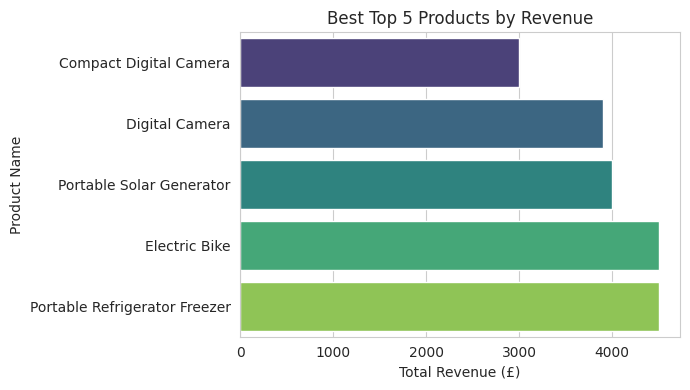

In [30]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=top_5.sort_values('total_revenue'),
    y='Product Name',
    x='total_revenue',
    palette='viridis'
)
plt.title('Best Top 5 Products by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

/tmp/ipython-input-31-1485752733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


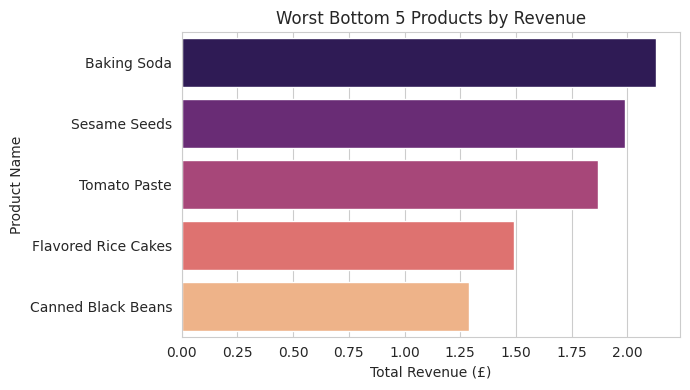

In [31]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=bottom_5.sort_values('total_revenue', ascending=False),  # Sort descending so lowest is at bottom
    y='Product Name',
    x='total_revenue',
    palette='magma'
)
plt.title('Worst Bottom 5 Products by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

7. **Calculating Highest Margin.**

In [11]:
# calculating margin
sales_df['Margin'] = sales_df['Sales'] - sales_df['Cost Price']

# aggregating margin by category
category_margin = sales_df.groupby('Category').agg(
    total_margin=pd.NamedAgg(column='Margin', aggfunc='sum'),
    avg_margin=pd.NamedAgg(column='Margin', aggfunc='mean')
).reset_index()

# sorting categories by total margin descending
top_margin = category_margin.sort_values(by='total_margin', ascending=False)

print(top_margin.head(5))

        Category  total_margin  avg_margin
122      Outdoor     23532.382   46.232578
119      Kitchen     23239.987   25.937485
115         Home     14342.611   24.475445
30   Electronics     14136.782   59.149715
31       Fitness      9371.684   26.399110


8. **Visualising the Margin.**

/tmp/ipython-input-33-2989398509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


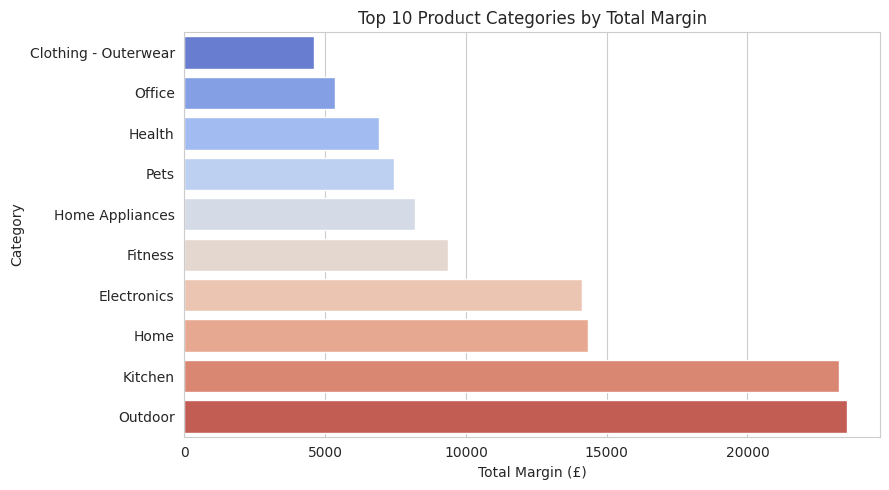

In [33]:
plt.figure(figsize=(9,5))
sns.barplot(
    data=top_margin.head(10).sort_values('total_margin'),
    y='Category',
    x='total_margin',
    palette='coolwarm'
)
plt.title('Top 10 Product Categories by Total Margin')
plt.xlabel('Total Margin (£)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

9. **Sales distribution.**

In [12]:
# aggregating sales by order mode
order_mode_summary = sales_df.groupby('Order Mode').agg(
    total_sales=pd.NamedAgg(column='Sales', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='Quantity', aggfunc='sum')
).reset_index()

print(order_mode_summary)

  Order Mode  total_sales  total_quantity
0   In-Store    145746.63           55851
1     Online    155587.32           59553


10. **Visualisation of Sales.**

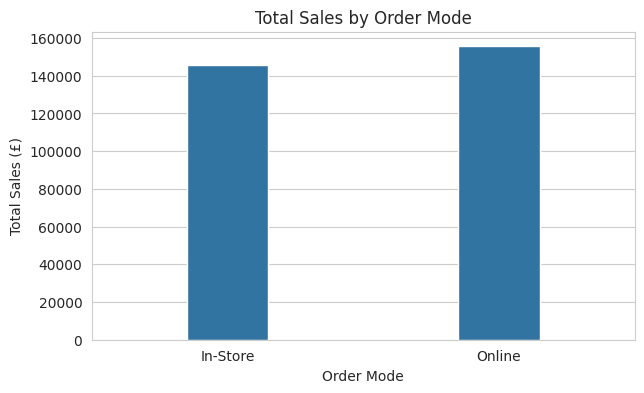

In [28]:
# visualization
plt.figure(figsize=(7,4))
sns.barplot(data=order_mode_summary, x='Order Mode', y='total_sales', width=0.3)
plt.title('Total Sales by Order Mode')
plt.ylabel('Total Sales (£)')
plt.xlabel('Order Mode')
plt.show()

